<div style="background-color: #00FF00; padding: 20px;">
    <p style='text-align:center;
              font-family: sans-serif;
              font-weight:bold;
              color:black;
              font-size:50px;
              margin: 10px;'> 
        <font color='blue'; size='7'>Price Forecasting</font>
    </p>
    <p style="text-align:center;
              font-family: sans-serif;
              font-weight:bold;
              color:tomato;
              font-size:40px;
              margin: 10px;">
        Long Short Term Memory (LSTM) Model
    </p>
</div>

<h1 style="text-align: center; color: WHITE; font-size:30px; background-color: #00FF00; padding: 10px; border-radius: 5px;">
    Project Workflow
</h1>>


### 1. Load and Preprocess Data:
- Load the data using `pandas`.
- Perform any necessary preprocessing, such as filling missing values, scaling the data, and splitting it into train and test sets.

### 2. Build the LSTM Model:
- Design a simple LSTM model using LSTM layers, followed by dense layers.
- Compile the model with a suitable optimizer and loss function.

### 3. Fit the Model:
- Train the model on the training data and validate it on the test data.

### 4. Make Predictions:
- Predict on the test set using the trained model.

### 5. Evaluate the Model:
- Compute evaluation metrics such as MAE, MSE, and R².
- Plot `y_test` vs. `y_pred`.
- Store the results in a `pandas` DataFrame.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='pandas')
warnings.filterwarnings("ignore", category=UserWarning, module='keras')

C:\Users\USER\AppData\Local\Temp\ipykernel_5740\1556372434.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  zinc_prices['Date'] = pd.to_datetime(zinc_prices['Date'])


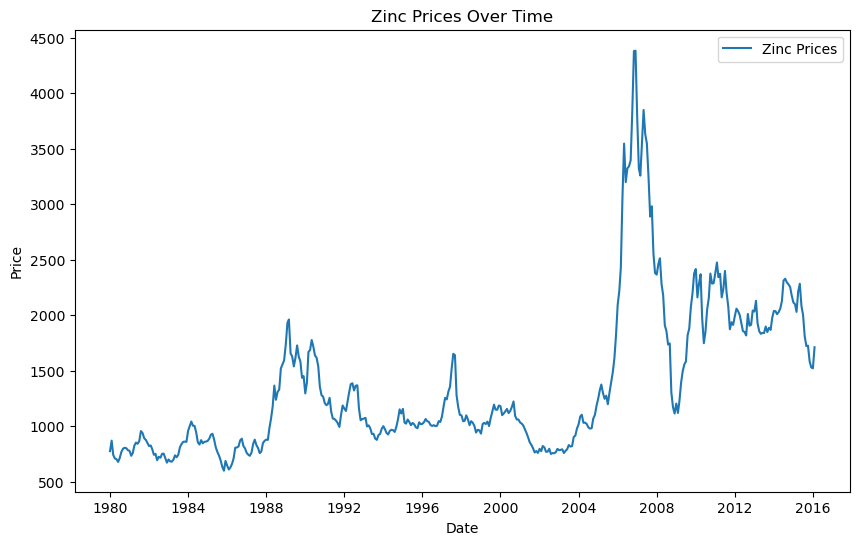

In [2]:
# Step 1: Get Data
file_path = 'zinc_prices_IMF.csv'  # Replace with your file path
zinc_prices = pd.read_csv(file_path)

# Step 2: Set Date as index and convert to datetime
zinc_prices['Date'] = pd.to_datetime(zinc_prices['Date'])
zinc_prices.set_index('Date', inplace=True)

# Step 3: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(zinc_prices, label='Zinc Prices')
plt.title('Zinc Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 4: Prepare Data for LSTM Model
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(zinc_prices.values)

# Convert the data into sequences (LSTM needs sequences as input)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # Using past 12 months to predict the next month
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]




In [3]:
# Step 5: Build the LSTM Model
model = Sequential()

# First LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Adding Dropout to prevent overfitting

# Second LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Fourth LSTM layer without return sequences
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 12, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 12, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Step 6: Train the Model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 0.0317 - val_loss: 0.0076
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0159 - val_loss: 0.0090
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0164 - val_loss: 0.0203
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0128 - val_loss: 0.0086
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0105 - val_loss: 0.0091
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0115 - val_loss: 0.0120
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0167 - val_loss: 0.0073
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - val_loss: 0.0080
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0117 - val_loss: 0.0103
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0121 - val_loss: 0.0076
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0076 - val_loss: 0.0079
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

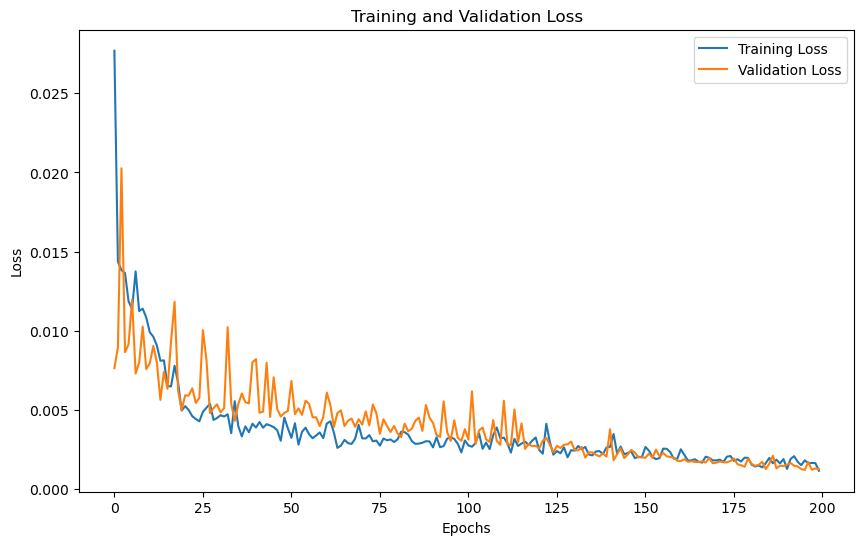

In [5]:
# Step 7: Evaluate Model Performance
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
# Step 8: Make Predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step


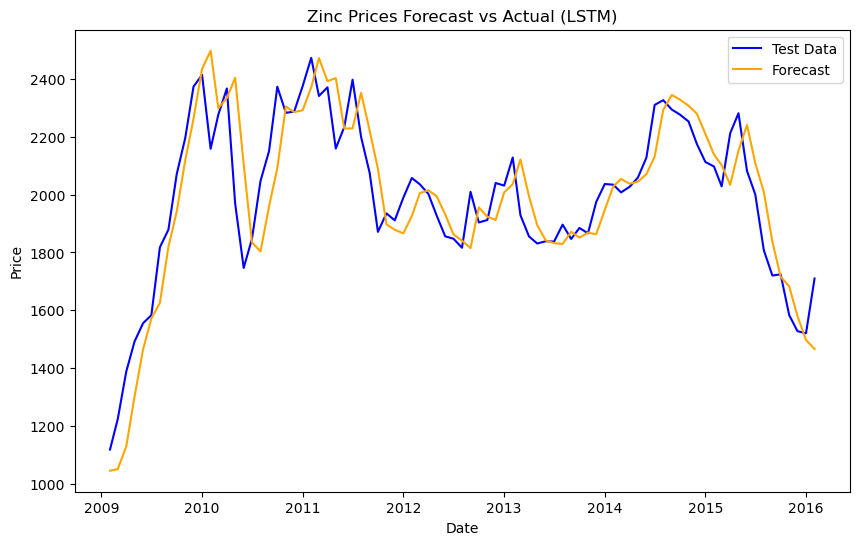

In [7]:
# Step 9: Create a dataframe with y_test and y_pred and save it as LSTM.csv
results_df = pd.DataFrame({
    'Date': zinc_prices.index[train_size + seq_length:],
    'y_test': y_test_rescaled.flatten(),
    'y_pred': y_pred_rescaled.flatten()
})

# Save the DataFrame to a CSV file
results_df.to_csv('LSTM.csv', index=False)

# Step 10: Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(results_df['Date'], results_df['y_test'], label='Test Data', color='blue')
plt.plot(results_df['Date'], results_df['y_pred'], label='Forecast', color='orange')
plt.title('Zinc Prices Forecast vs Actual (LSTM)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [8]:
# Step 11: Evaluate Forecast Accuracy
mae = mean_absolute_error(results_df['y_test'], results_df['y_pred'])
mse = mean_squared_error(results_df['y_test'], results_df['y_pred'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

print("Results saved to LSTM.csv")

Mean Absolute Error: 100.30299362362132
Mean Squared Error: 18071.173899240373
Root Mean Squared Error: 134.4290664225575
Results saved to LSTM.csv
